# 📊Stock Market Analysis 📈 + Prediction using LSTM
## Building the RNN

- Importing the Keras libraries and packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Normalization
from keras.layers import LSTM
from keras.layers import Dropout

### Importing data

In [2]:
training_set = pd.read_csv("train.csv", index_col="Date")

In [3]:
training_set.head()

,Open
Date,
2012-01-03,325.25
2012-01-04,331.27
2012-01-05,329.83
2012-01-06,328.34
2012-01-09,322.04


### Feature Scaling

In [4]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output for training and validatoin

In [5]:
X_train = []
y_train = []

for i in range(60, 1000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_validation = []
y_validation = []
for i in range(1060, 1258):
    X_validation.append(training_set_scaled[i-60:i, 0])
    y_validation.append(training_set_scaled[i, 0])
# Reshaping
X_validation, y_validation = np.array(X_validation), np.array(y_validation)
X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))

### Initialising the RNN

In [6]:
regressor = Sequential([
    # Adding the first LSTM layer and some Dropout regularisation
    LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)),
    Dropout(0.2),

    #Adding a second LSTM layer and some Dropout regularisation
    LSTM(units = 64, return_sequences = True),
    Dropout(0.2),
    
    # Adding a fourth LSTM layer and some Dropout regularisation
    LSTM(units = 32),
    Dropout(0.2),
    
    Dense(units = 16),

    # Adding the output layer
    Dense(units = 1),
    
])

### Compiling the RNN

In [7]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 128)           66560     
_________________________________________________________________
dropout (Dropout)            (None, 60, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 64)            49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                5

### Fitting the RNN to the Training set

In [8]:
history = regressor.fit(X_train, y_train,validation_data=(X_validation, y_validation), epochs = 100, batch_size = 32)

Epoch 1/100
30/30 [==============================] - 17s 54ms/step - loss: 0.0553 - val_loss: 0.0138
Epoch 2/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0042 - val_loss: 0.0014
Epoch 3/100
30/30 [==============================] - 1s 18ms/step - loss: 0.0038 - val_loss: 0.0015
Epoch 4/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 5/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 6/100
30/30 [==============================] - 0s 13ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 7/100
30/30 [==============================] - 0s 13ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 8/100
30/30 [==============================] - 0s 13ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 9/100
30/30 [==============================] - 0s 13ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 10/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0028 - val_loss: 0.007

30/30 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 81/100
30/30 [==============================] - 0s 14ms/step - loss: 9.5791e-04 - val_loss: 7.7408e-04
Epoch 82/100
30/30 [==============================] - 0s 14ms/step - loss: 0.0011 - val_loss: 4.9624e-04
Epoch 83/100
30/30 [==============================] - 0s 14ms/step - loss: 9.2317e-04 - val_loss: 4.2520e-04
Epoch 84/100
30/30 [==============================] - 0s 13ms/step - loss: 9.1281e-04 - val_loss: 5.1806e-04
Epoch 85/100
30/30 [==============================] - 0s 14ms/step - loss: 9.0443e-04 - val_loss: 4.0942e-04
Epoch 86/100
30/30 [==============================] - 0s 15ms/step - loss: 0.0012 - val_loss: 5.2062e-04
Epoch 87/100
30/30 [==============================] - 1s 18ms/step - loss: 9.4215e-04 - val_loss: 5.0007e-04
Epoch 88/100
30/30 [==============================] - 0s 17ms/step - loss: 8.0700e-04 - val_loss: 0.0022
Epoch 89/100
30/30 [==============================] 

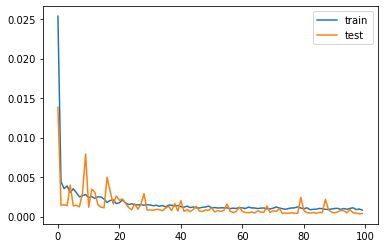

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Making the predictions and visualising the results
- Getting the real stock price of 2017

In [10]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)
dataset = pd.read_csv('dataset.csv',index_col="Date",parse_dates=True)

In [11]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [12]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [13]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [14]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [15]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [16]:
test_set.head()

,Open
Date,
2017-01-03,778.81
2017-01-04,788.36
2017-01-05,786.08
2017-01-06,795.26
2017-01-09,806.40


In [17]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


### Getting the predicted stock price of 2017

In [18]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.array(y_test)


print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(940, 60, 1) (940,) (198, 60, 1) (198,) (20, 60, 1) (20,)


In [19]:
predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [20]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


### Visualising the results

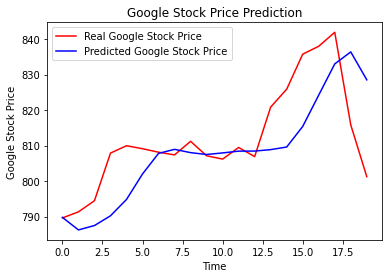

In [21]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()